<a href="https://colab.research.google.com/github/SadhuSabyay/A-Cascaded-Dilated-Convolution-Approach-for-Mpox-Lesion-Classification/blob/main/MPox_CSV_MultiCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
dataset = pd.read_csv('/content/drive/MyDrive/MonkeyPoxDetection/Data.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=44)

# XGBoost Normal

accuracy:    1.0 f1-score:    1.0 precision:   1.0 recall:      1.0 sensitivity: 1.0 specificity: 1.0 




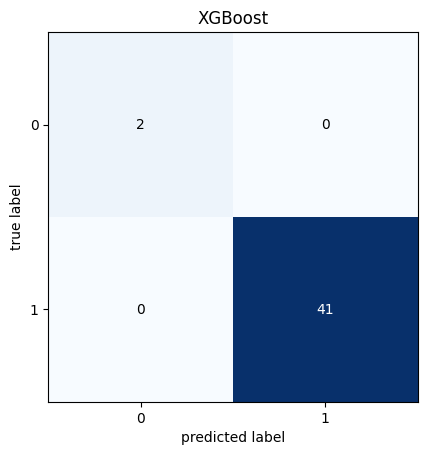

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=935)
classifier = XGBClassifier(learning_rate=0.0991, gamma=0, n_estimators = 80)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# plot_confusion_matrix(classifier, X_test, y_test)

fig, ax = plot_confusion_matrix(cm)
ax.set_title('XGBoost')
plt.savefig('XGBoost_cm.svg', bbox_inches='tight')

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])

print('accuracy:   ', accuracy_score(y_test, y_pred)
         , 'f1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , 'precision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , 'recall:     ', recall_score(y_test, y_pred, average='weighted')
         , 'sensitivity:', sensitivity
         , 'specificity:', specificity, '\n\n')

# K-Fold (XGBoost)

In [13]:
from sklearn.model_selection import KFold
k=5
kf = KFold(n_splits=k, random_state=722, shuffle=True)
kf.get_n_splits(X)
i=1
accuracy_av = f1_score_av = precision_av = recall_av = sensitivity_av = specificity_av = 0


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classifier = XGBClassifier(learning_rate=0.0991, gamma=0, n_estimators = 80, eta = 0.255)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])

    print('Fold ', i, ':\n        accuracy:   ', accuracy_score(y_test, y_pred)
         , '\n        f1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\n        precision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\n        recall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\n        sensitivity:', sensitivity
         , '\n        specificity:', specificity, '\n\n')

    accuracy_av+=accuracy_score(y_test, y_pred) / k
    f1_score_av+=f1_score(y_test, y_pred, average='weighted') / k
    precision_av+=precision_score(y_test, y_pred, average='weighted',  zero_division=0) / k
    recall_av+=recall_score(y_test, y_pred, average='weighted') / k
    sensitivity_av+=sensitivity / k
    specificity_av+=specificity / k

    i+=1

print('Averages:', '\n        accuracy average:   ', accuracy_av
    , '\n        f1-score average:   ', f1_score_av
    , '\n        precision average:  ', precision_av
    , '\n        recall average:     ', recall_av
    , '\n        sensitivity average:', sensitivity_av
    , '\n        specificity average:', specificity_av, '\n\n')


[[ 0  4]
 [ 0 39]]
Fold  1 :
        accuracy:    0.9069767441860465 
        f1-score:    0.862733976176971 
        precision:   0.8226068144943213 
        recall:      0.9069767441860465 
        sensitivity: 0.0 
        specificity: 1.0 


[[ 0  5]
 [ 0 37]]
Fold  2 :
        accuracy:    0.8809523809523809 
        f1-score:    0.8251959011452682 
        precision:   0.7760770975056689 
        recall:      0.8809523809523809 
        sensitivity: 0.0 
        specificity: 1.0 


[[ 1  3]
 [ 0 38]]
Fold  3 :
        accuracy:    0.9285714285714286 
        f1-score:    0.9084990958408681 
        precision:   0.9337979094076655 
        recall:      0.9285714285714286 
        sensitivity: 0.25 
        specificity: 1.0 


[[ 0  5]
 [ 0 37]]
Fold  4 :
        accuracy:    0.8809523809523809 
        f1-score:    0.8251959011452682 
        precision:   0.7760770975056689 
        recall:      0.8809523809523809 
        sensitivity: 0.0 
        specificity: 1.0 


[[ 0  7]
 [ 

# SVM


accuracy:    0.8333333333333334 
f1-score:    0.7575757575757576 
precision:   0.6944444444444444 
recall:      0.8333333333333334 
sensitivity: 0.0 
specificity: 1.0 




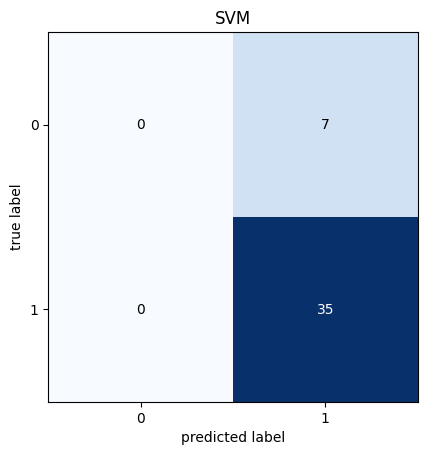

In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0, degree=3, gamma='scale')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
# plot_confusion_matrix(classifier, X_test, y_test)

fig, ax = plot_confusion_matrix(cm)
ax.set_title('SVM')
plt.savefig('SVM_cm.svg', bbox_inches='tight')

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])

print('\naccuracy:   ', accuracy_score(y_test, y_pred)
         , '\nf1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\nprecision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\nrecall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\nsensitivity:', sensitivity
         , '\nspecificity:', specificity, '\n\n')

# Random forest


accuracy:    0.8571428571428571 
f1-score:    0.8092105263157895 
precision:   0.8780487804878048 
recall:      0.8571428571428571 
sensitivity: 0.14285714285714285 
specificity: 1.0 




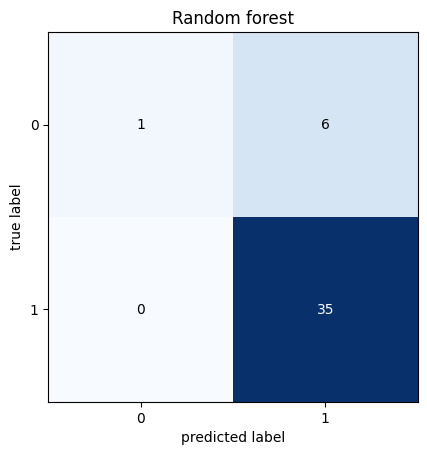

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 120)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
# plot_confusion_matrix(classifier, X_test, y_test)

fig, ax = plot_confusion_matrix(cm)
ax.set_title('Random forest')
plt.savefig('RF_cm.svg', bbox_inches='tight')

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])

print('\naccuracy:   ', accuracy_score(y_test, y_pred)
         , '\nf1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\nprecision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\nrecall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\nsensitivity:', sensitivity
         , '\nspecificity:', specificity, '\n\n')

# K-Fold (Random Forest)

In [16]:
from sklearn.model_selection import KFold
k=5
kf = KFold(n_splits=k, random_state=722, shuffle=True)
kf.get_n_splits(X)
i=1
accuracy_av = f1_score_av = precision_av = recall_av = sensitivity_av = specificity_av = 0


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 120)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])

    print('Fold ', i, ':\n        accuracy:   ', accuracy_score(y_test, y_pred)
         , '\n        f1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\n        precision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\n        recall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\n        sensitivity:', sensitivity
         , '\n        specificity:', specificity, '\n\n')

    accuracy_av+=accuracy_score(y_test, y_pred) / k
    f1_score_av+=f1_score(y_test, y_pred, average='weighted') / k
    precision_av+=precision_score(y_test, y_pred, average='weighted',  zero_division=0) / k
    recall_av+=recall_score(y_test, y_pred, average='weighted') / k
    sensitivity_av+=sensitivity / k
    specificity_av+=specificity / k

    i+=1

print('Averages:', '\n        accuracy average:   ', accuracy_av
    , '\n        f1-score average:   ', f1_score_av
    , '\n        precision average:  ', precision_av
    , '\n        recall average:     ', recall_av
    , '\n        sensitivity average:', sensitivity_av
    , '\n        specificity average:', specificity_av, '\n\n')


[[ 0  4]
 [ 5 34]]
Fold  1 :
        accuracy:    0.7906976744186046 
        f1-score:    0.80096647538508 
        precision:   0.8115055079559362 
        recall:      0.7906976744186046 
        sensitivity: 0.0 
        specificity: 0.8717948717948718 


[[ 0  5]
 [ 0 37]]
Fold  2 :
        accuracy:    0.8809523809523809 
        f1-score:    0.8251959011452682 
        precision:   0.7760770975056689 
        recall:      0.8809523809523809 
        sensitivity: 0.0 
        specificity: 1.0 


[[ 2  2]
 [ 1 37]]
Fold  3 :
        accuracy:    0.9285714285714286 
        f1-score:    0.9239332096474953 
        precision:   0.9218559218559218 
        recall:      0.9285714285714286 
        sensitivity: 0.5 
        specificity: 0.9736842105263158 


[[ 2  3]
 [ 0 37]]
Fold  4 :
        accuracy:    0.9285714285714286 
        f1-score:    0.9146567717996289 
        precision:   0.9339285714285714 
        recall:      0.9285714285714286 
        sensitivity: 0.4 
        spec

In [19]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


# CatBoost

0:	learn: 0.4184558	total: 47.1ms	remaining: 895ms
1:	learn: 0.3426976	total: 48ms	remaining: 432ms
2:	learn: 0.3038759	total: 48.5ms	remaining: 275ms
3:	learn: 0.2847097	total: 49ms	remaining: 196ms
4:	learn: 0.2743148	total: 49.5ms	remaining: 148ms
5:	learn: 0.2627026	total: 49.9ms	remaining: 117ms
6:	learn: 0.2529648	total: 50.6ms	remaining: 93.9ms
7:	learn: 0.2458434	total: 51.1ms	remaining: 76.6ms
8:	learn: 0.2167139	total: 51.6ms	remaining: 63.1ms
9:	learn: 0.2151508	total: 52ms	remaining: 52ms
10:	learn: 0.2113861	total: 52.5ms	remaining: 42.9ms
11:	learn: 0.2099718	total: 52.9ms	remaining: 35.3ms
12:	learn: 0.2036945	total: 53.4ms	remaining: 28.8ms
13:	learn: 0.2015841	total: 53.8ms	remaining: 23.1ms
14:	learn: 0.1978620	total: 54.3ms	remaining: 18.1ms
15:	learn: 0.1956975	total: 54.8ms	remaining: 13.7ms
16:	learn: 0.1794068	total: 55.3ms	remaining: 9.76ms
17:	learn: 0.1781262	total: 55.8ms	remaining: 6.2ms
18:	learn: 0.1773457	total: 56.3ms	remaining: 2.96ms
19:	learn: 0.17033

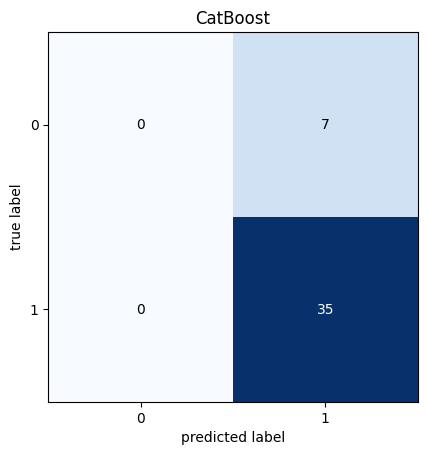

In [20]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(iterations=20, learning_rate=0.44, max_depth=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
# plot_confusion_matrix(classifier, X_test, y_test)

fig, ax = plot_confusion_matrix(cm)
ax.set_title('CatBoost')
plt.savefig('CatBoost_cm.svg', bbox_inches='tight')

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])

print('\naccuracy:   ', accuracy_score(y_test, y_pred)
         , '\nf1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\nprecision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\nrecall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\nsensitivity:', sensitivity
         , '\nspecificity:', specificity, '\n\n')

# LightGBM

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Number of positive: 151, number of negative: 18
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8
[LightGBM] [Info] Number of data points in the train set: 169, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.893491 -> initscore=2.126908
[LightGBM] [Info] Start training from score 2.126908
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

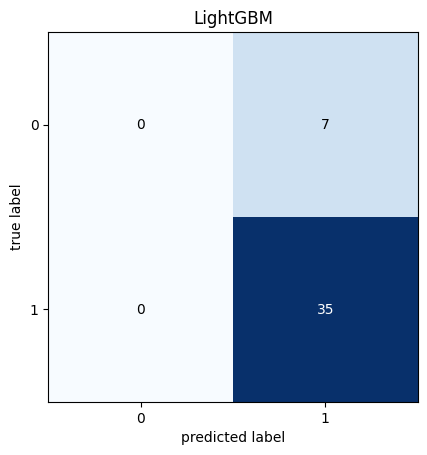

In [21]:
from lightgbm import LGBMClassifier
classifier = LGBMClassifier(n_estimators = 20, num_threads = 8, bagging_fraction = 1, max_depth = 6)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
# plot_confusion_matrix(classifier, X_test, y_test)

fig, ax = plot_confusion_matrix(cm)
ax.set_title('LightGBM')
plt.savefig('LightGBM_cm.svg', bbox_inches='tight')

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])

print('\naccuracy:   ', accuracy_score(y_test, y_pred)
         , '\nf1-score:   ', f1_score(y_test, y_pred, average='weighted')
         , '\nprecision:  ', precision_score(y_test, y_pred, average='weighted',  zero_division=0)
         , '\nrecall:     ', recall_score(y_test, y_pred, average='weighted')
         , '\nsensitivity:', sensitivity
         , '\nspecificity:', specificity, '\n\n')